In [152]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

1. Data Preprocissing:

In [153]:
# Load the dataset

file_path = "dataset.csv" 

cols = ['age', 'gender', 'governante', 'address', 'edu_level', 'fin_level', 'hand', 'mstatus', 'fam_size', 'work_type', 'Q3', 'Q5', 'Q10', 'Q13', 'Q16', 'Q17', 'Q21', 'Depression_label']
data = pd.read_csv(file_path)  # , names=cols


# Display the first 10 rows of the dataset to understand its structure

data.head(10)

,Unnamed: 0,age,gender,governante,address,edu_level,fin_level,hand,mstatus,fam_size,work_type,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Depression_label
0,0,4,0,14,1,3,1,2,2,5,5,0,0,0,1,0,0,0,Normal
1,1,3,1,12,1,3,1,1,1,6,6,0,1,0,1,1,0,0,Normal
2,2,3,0,14,2,3,1,1,1,5,5,0,0,0,1,0,0,0,Normal
3,3,3,0,1,2,2,1,1,2,2,3,0,1,0,1,0,0,0,Normal
4,4,2,1,1,1,1,1,1,3,8,1,0,0,0,1,1,1,0,Normal
5,5,3,0,1,3,1,3,1,1,5,1,0,1,3,0,1,1,1,Normal
6,6,3,1,5,1,3,2,1,3,7,1,1,3,0,0,0,0,0,Normal
7,7,3,0,3,1,2,3,2,1,4,5,0,3,3,0,0,0,0,Normal
8,8,4,1,1,2,1,1,1,2,7,4,0,1,2,0,0,1,0,Normal
9,9,3,1,1,1,2,1,1,2,5,4,1,2,3,3,2,3,0,Moderate


In [154]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

Unnamed: 0          0
age                 0
gender              0
governante          0
address             0
edu_level           0
fin_level           0
hand                0
mstatus             0
fam_size            0
work_type           0
Q3                  0
Q5                  0
Q10                 0
Q13                 0
Q16                 0
Q17                 0
Q21                 0
Depression_label    0
dtype: int64

Now replace the Catigories of depression label into numerical values

In [155]:
data["Depression_label"] = data["Depression_label"].map(
    {
        "Mild": 1,
        "Moderate": 2,
        "Normal": 3,
        "Severe": 4,
    }
)

# Display the first 10 rows of the dataset to understand its structure
data.head(10)

,Unnamed: 0,age,gender,governante,address,edu_level,fin_level,hand,mstatus,fam_size,work_type,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Depression_label
0,0,4,0,14,1,3,1,2,2,5,5,0,0,0,1,0,0,0,3
1,1,3,1,12,1,3,1,1,1,6,6,0,1,0,1,1,0,0,3
2,2,3,0,14,2,3,1,1,1,5,5,0,0,0,1,0,0,0,3
3,3,3,0,1,2,2,1,1,2,2,3,0,1,0,1,0,0,0,3
4,4,2,1,1,1,1,1,1,3,8,1,0,0,0,1,1,1,0,3
5,5,3,0,1,3,1,3,1,1,5,1,0,1,3,0,1,1,1,3
6,6,3,1,5,1,3,2,1,3,7,1,1,3,0,0,0,0,0,3
7,7,3,0,3,1,2,3,2,1,4,5,0,3,3,0,0,0,0,3
8,8,4,1,1,2,1,1,1,2,7,4,0,1,2,0,0,1,0,3
9,9,3,1,1,1,2,1,1,2,5,4,1,2,3,3,2,3,0,2


In [156]:
label_counts = data["Depression_label"].value_counts()
# 1 for Mild, 2 for Moderate, 3 for Normal, 4 for Severe

label_counts

3    572
1     95
2     57
4      4
Name: Depression_label, dtype: int64

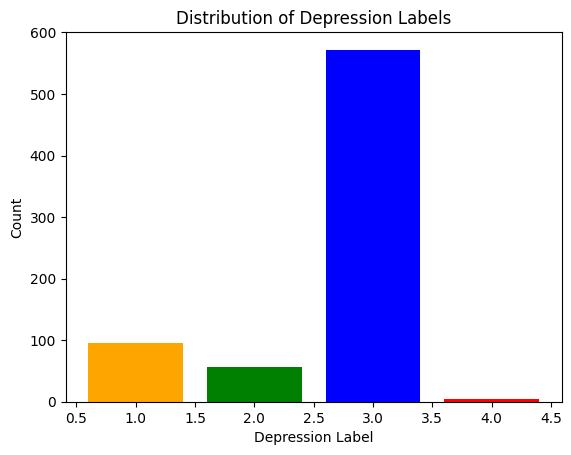

In [157]:
# Visualize the distribution of the target variable
plt.bar(
    label_counts.index, label_counts.values, color=["blue", "orange", "green", "red"]
)
plt.title("Distribution of Depression Labels")
plt.xlabel("Depression Label")
plt.ylabel("Count")
plt.show()

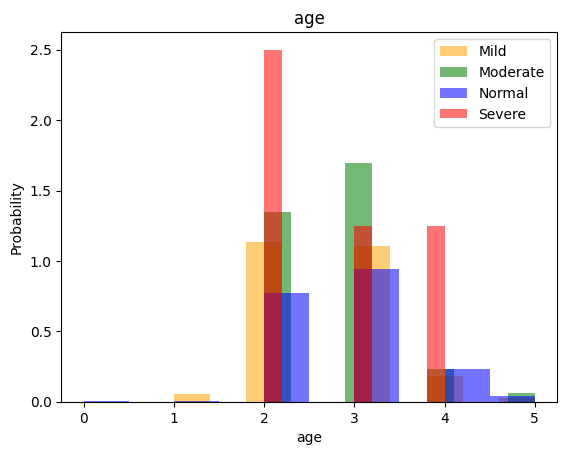

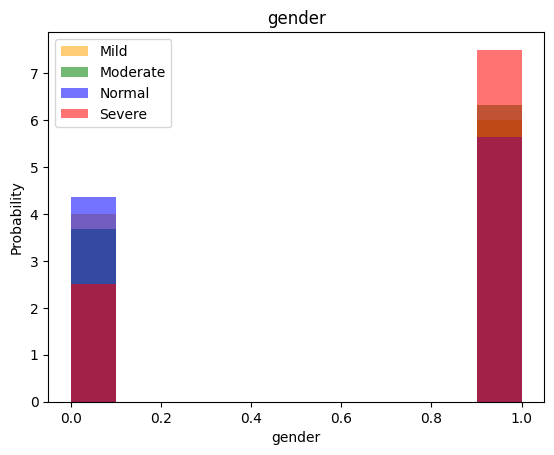

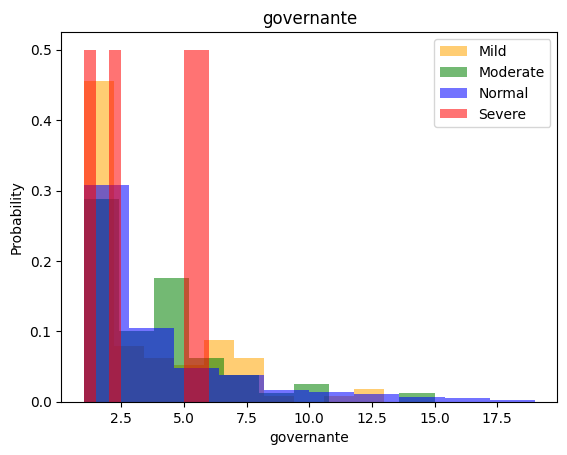

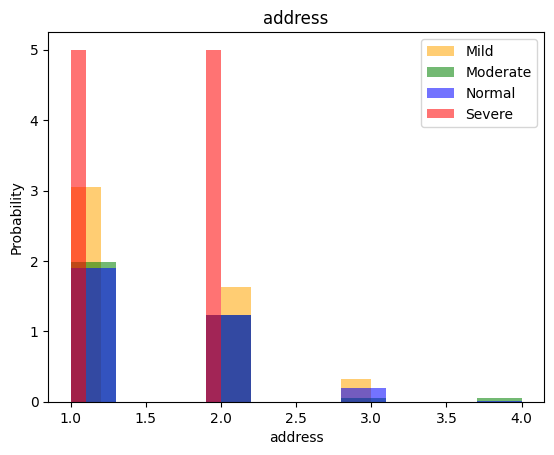

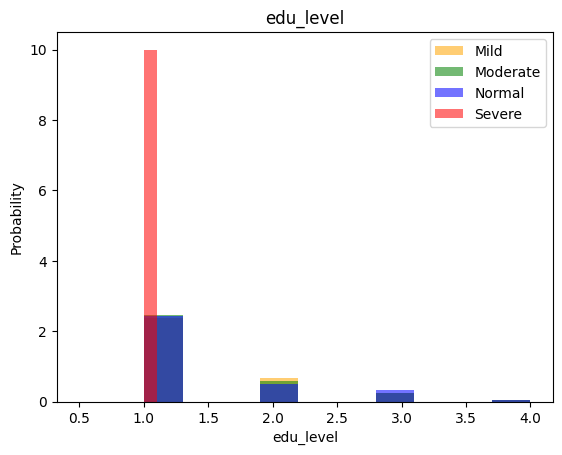

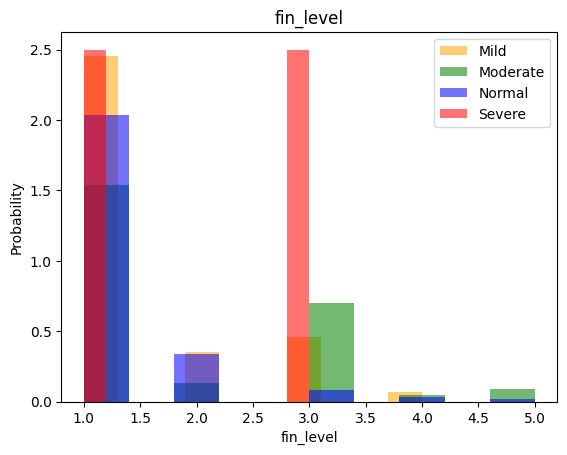

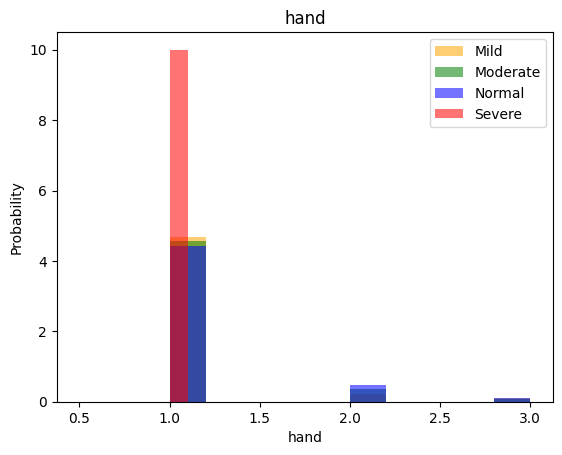

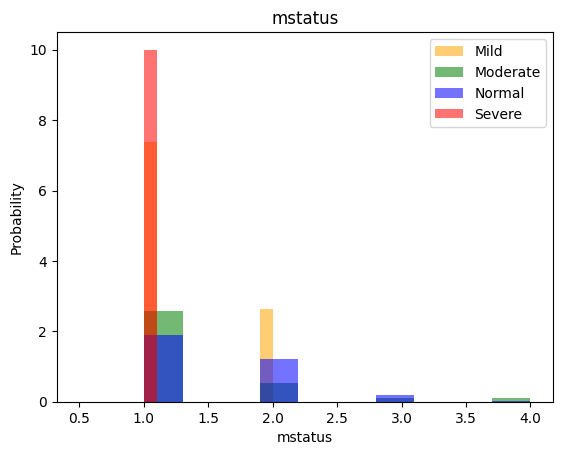

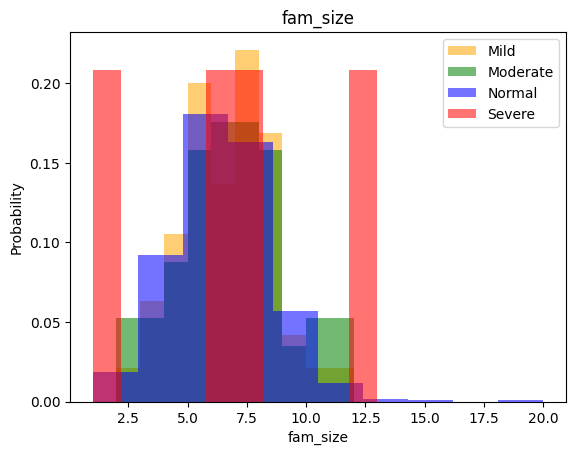

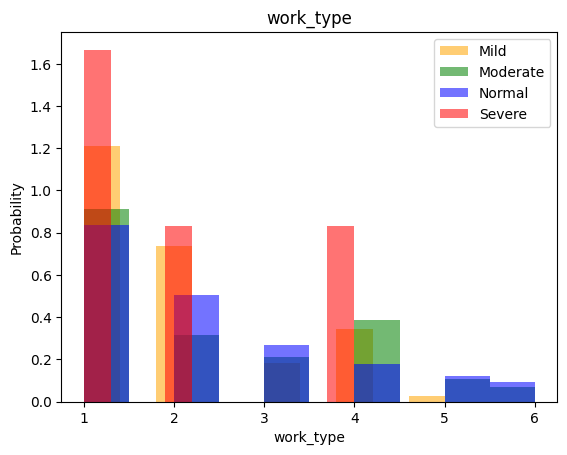

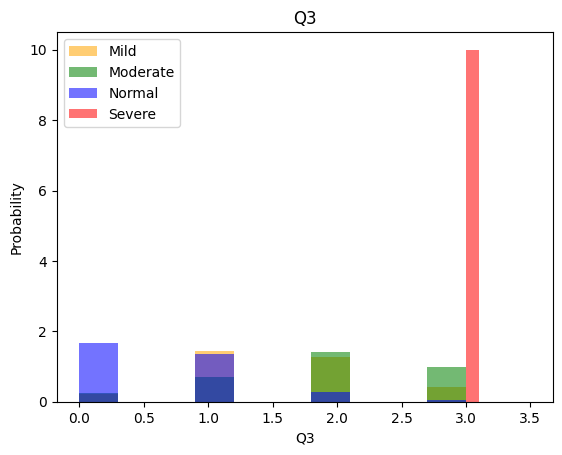

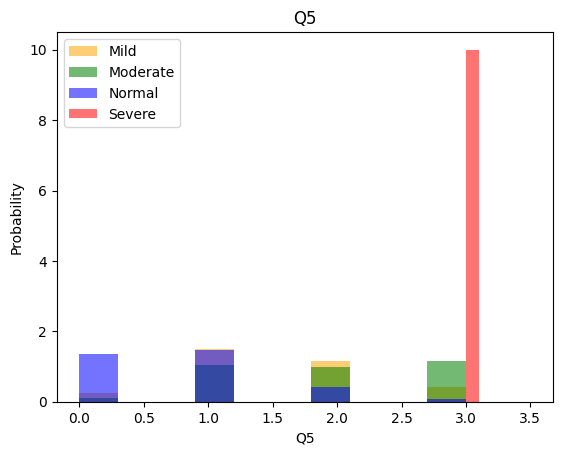

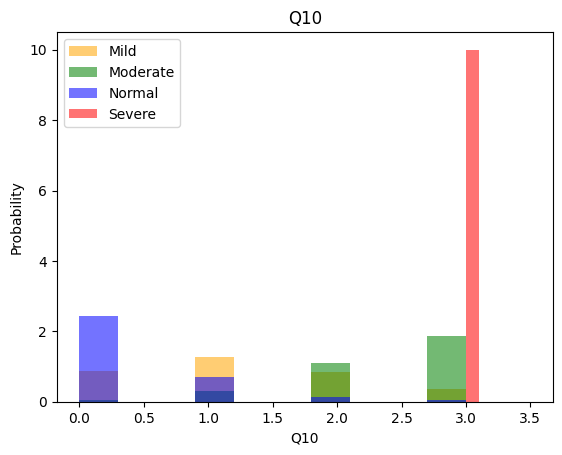

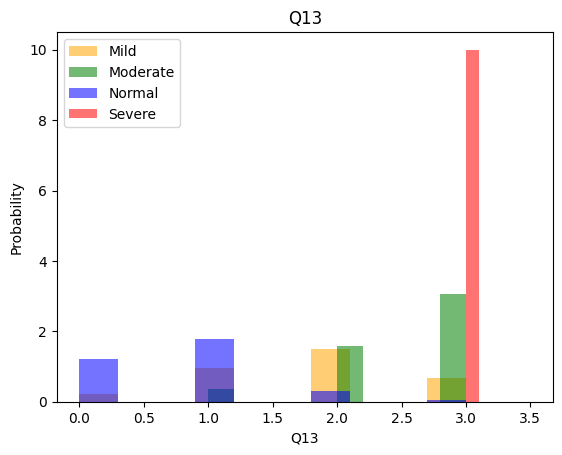

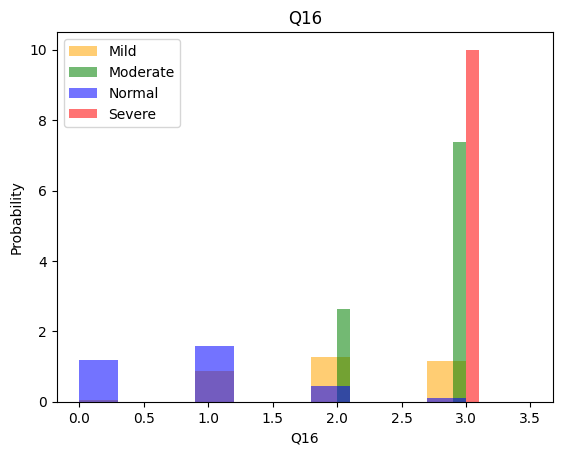

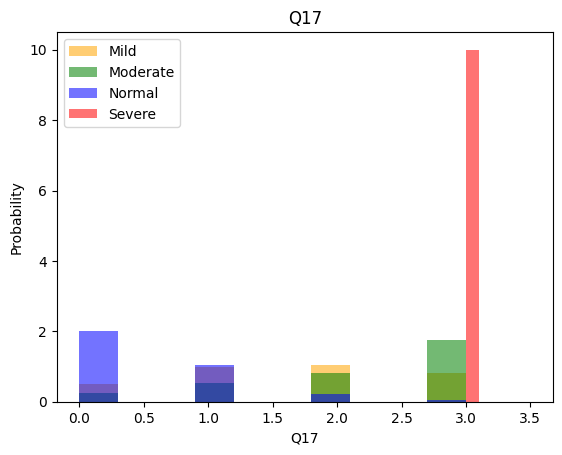

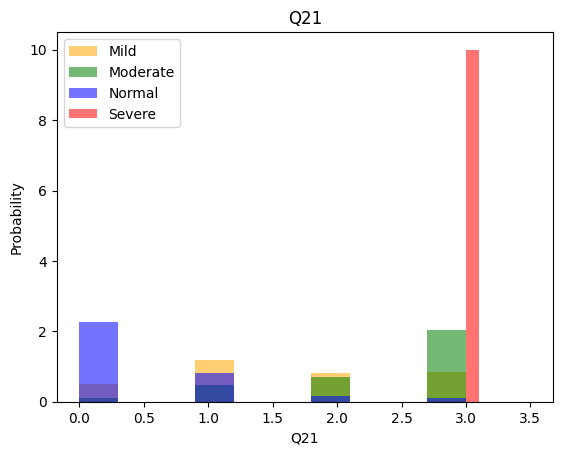

In [158]:
for label in cols[:-1]:
    plt.hist(
        data[data["Depression_label"] == 1][label],
        color="orange",
        label="Mild",
        alpha=0.55,
        density=True,
    )
    plt.hist(
        data[data["Depression_label"] == 2][label],
        color="green",
        label="Moderate",
        alpha=0.55,
        density=True,
    )
    plt.hist(
        data[data["Depression_label"] == 3][label],
        color="blue",
        label="Normal",
        alpha=0.55,
        density=True,
    )
    plt.hist(
        data[data["Depression_label"] == 4][label],
        color="red",
        label="Severe",
        alpha=0.55,
        density=True,
    )
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, test, and validation Datasets

In [159]:
train, valid, test = np.split(
    data.sample(frac=1), [int(0.7 * len(data)), int(0.85 * len(data))]
)

In [160]:
def scale_dataset(dataframe, oversample=False):
    features = dataframe[dataframe.columns[:-1]].values
    target = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    if oversample:
        ros = RandomOverSampler()
        features, target = ros.fit_resample(features, target)

    data = np.hstack((features, np.reshape(target, (-1, 1))))

    return data, features, target

In [169]:
train_data, train_features, train_target = scale_dataset(train, oversample=True)
valid_data, valid_features, valid_target = scale_dataset(valid)
test_data, test_features, test_target = scale_dataset(test)